In [4]:
# General Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn imports 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For making decision boundry
from mlxtend.plotting import plot_decision_regions

In [5]:
# Creating the data frame
df = pd.read_csv('/Users/vishnumr/My Files/Programs/Python/6thSemLab/Data/placement.csv')
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [6]:
plt.scatter??

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    *,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    colorizer: 'Colorizer | None' = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rc

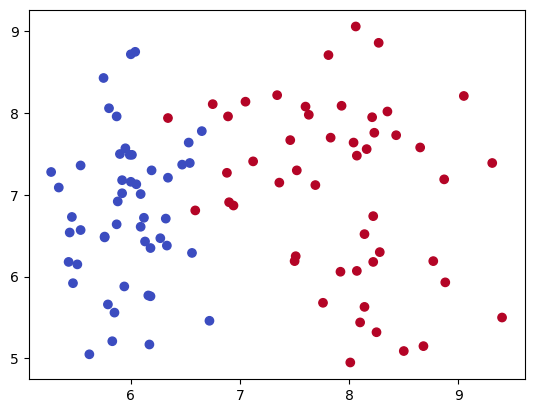

In [8]:
plt.scatter(df.cgpa, df.resume_score, c=df.placed, cmap='coolwarm')
plt.show()

In [5]:
# plt.figure(figsize=(10,8))

# # Create heat map
# sns.pairplot(df)  

# plt.suptitle("Diabetes", fontsize=24)
# plt.show();

In [16]:
# Saperating the Indipendent and dependent variables(Columns)
X = df.drop(columns='placed')
y = df['placed']

In [17]:
# X2 = df[['max heart rate','age']]
# y2 = df['target']

In [18]:
X.shape, y.shape

((100, 2), (100,))

In [19]:
# Splitting the data into Train and Test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape, X_test.shape

((70, 2), (30, 2))

In [21]:
# Applying Standard scalar to bring the data into one scale.
scalar = StandardScaler()

X_train_Scaled = scalar.fit_transform(X_train)
X_test_Scaled = scalar.transform(X_test)

In [22]:
X_train_Scaled

array([[-1.24932188, -0.467461  ],
       [ 0.18374251,  1.13509891],
       [-0.10999119, -1.54918894],
       [ 0.54868437,  0.66434693],
       [ 2.19537326,  0.38389895],
       [ 1.71471812, -0.81802098],
       [ 1.34087524,  1.01490691],
       [-0.71526062,  1.74607487],
       [ 1.09164665,  0.47404294],
       [ 1.06494359,  0.63429894],
       [-1.23151984, -0.27715701],
       [ 1.80372833,  0.18357896],
       [-0.25240752, -0.71786099],
       [-0.45713101, -0.62771699],
       [-1.18701473, -0.85808498],
       [-0.08328813,  1.10505091],
       [-0.64405245, -0.28717301],
       [ 0.815715  , -1.32883695],
       [-0.97339023,  1.42556289],
       [ 1.47439055, -1.91978092],
       [ 1.22516197, -0.82803698],
       [ 0.03242515,  0.26370696],
       [ 0.8602201 ,  1.70601088],
       [-0.7508647 ,  1.71602688],
       [-0.46603203, -0.29718901],
       [-0.93778614, -1.34886895],
       [-1.33833209,  0.08341897],
       [ 0.96703236,  1.08501891],
       [ 1.17175584,

In [23]:
# Training and predicting the model
knn = KNeighborsClassifier(n_neighbors=3)

# Training 
knn.fit(X_train_Scaled, y_train)

# Predictiong
y_pred = knn.predict(X_test_Scaled)

In [24]:
X_test_Scaled.shape

(30, 2)

In [40]:
z = scalar.transform([[7.63,7.98]])
z

/Users/vishnumr/My Files/Programs/Python/6thSemLab/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.70000172, 0.97484292]])

In [41]:
knn.predict(z)

array([1])

In [27]:
accuracy_score(y_test, y_pred)

1.0

In [28]:
distances, indices = knn.kneighbors(X_test_Scaled)

In [30]:
indices

array([[66, 27,  3],
       [58, 32, 53],
       [21,  3, 69],
       [44, 17, 48],
       [14, 68, 25],
       [67, 63, 17],
       [62, 25,  2],
       [ 9,  8, 28],
       [30, 13, 31],
       [34, 60, 20],
       [62, 25, 14],
       [21,  3,  8],
       [51, 65, 43],
       [50, 28, 33],
       [25, 36, 62],
       [ 3,  8, 21],
       [41,  5, 19],
       [58, 32, 65],
       [58, 32, 16],
       [58, 32, 16],
       [35, 21, 24],
       [63, 20, 60],
       [13, 30, 31],
       [35, 21, 24],
       [57, 22, 27],
       [ 5, 20, 60],
       [19, 44, 41],
       [33,  9, 28],
       [ 8,  3, 34],
       [27,  3, 66]])

In [31]:
# Get the minimum distance and its index
min_distance = np.min(distances)
min_distance_index = np.unravel_index(np.argmin(distances), distances.shape)

print(f"Minimum Distance: {min_distance}")
print(f"Index of Minimum Distance: {min_distance_index}")

Minimum Distance: 0.010015999438003353
Index of Minimum Distance: (np.int64(12), np.int64(0))


In [33]:
scores = []

for i in [1,2,3,4,5,20,30]:
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train_Scaled, y_train)
    y_pred = knn.predict(X_test_Scaled)
    scores.append(accuracy_score(y_test, y_pred))

In [34]:
scores

[1.0, 1.0, 1.0, 0.9, 0.9, 0.9333333333333333, 0.9]

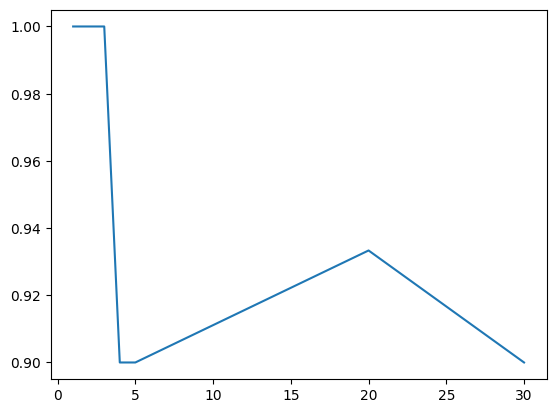

In [35]:
plt.plot([1,2,3,4,5,20,30], scores)
plt.show()

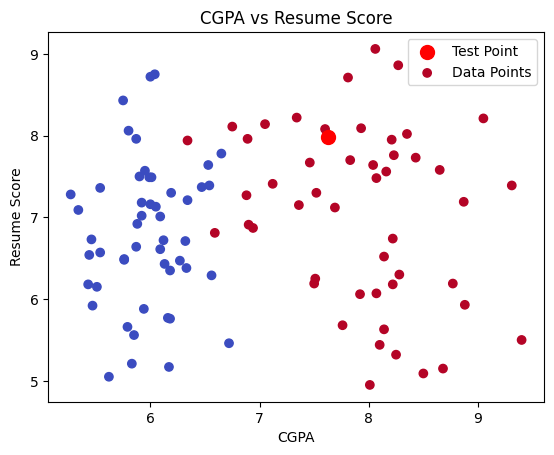

In [42]:
# Plot the predicted point
plt.scatter(7.63,7.98, color='red', marker='o', s=100, label='Test Point', zorder=3)  

# Plot the main dataset scatter plot
plt.scatter(df.cgpa, df.resume_score, c=df.placed,cmap='coolwarm', label='Data Points', zorder=2)

# Labels & Title
plt.xlabel("CGPA")
plt.ylabel("Resume Score")
plt.title("CGPA vs Resume Score")
plt.legend()

/var/folders/15/hcx9cgbn48z9wk5ngpns6jl40000gn/T/ipykernel_74056/1880027402.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plot_decision_regions(X_test_Scaled, y_test.ravel(), clf=knn, legend=1)


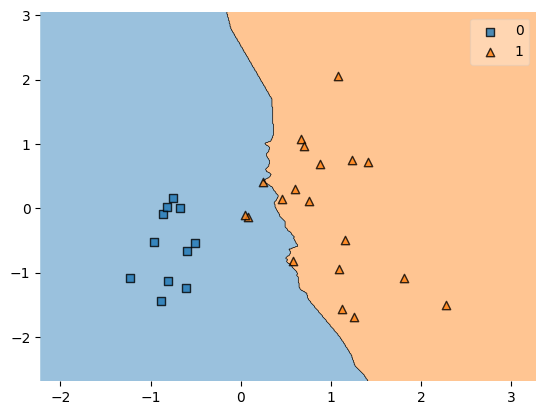

In [161]:
plot_decision_regions(X_test_Scaled, y_test.ravel(), clf=knn, legend=1)
plt.show();